# Tests

In [1]:
%display latex
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

## Example 1: Simple

In [2]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *

In [18]:
R.<x,y> = RIF[]

In [20]:
system = System(
    R,
    (x,y),
    [(1,2), (3,4)],
    [
        -y,
        x,
    ],
)

In [21]:
atomic = Atomic(x)

In [22]:
initials = [RIF(1, 2), RIF(3, 4)]

In [23]:
space_domain = [RIF(-1, 0), RIF(0, 0.5)]

In [27]:
from ulbc.context_signals import *
from ulbc.reach_trees import gen_sub_space_domains

In [28]:
physical_subdomain = list(
    vector(initials)
    +
    vector(gen_sub_space_domains(space_domain)[3])
)

In [29]:
from ulbc.tests.test_context_signals import sin_cos_solution

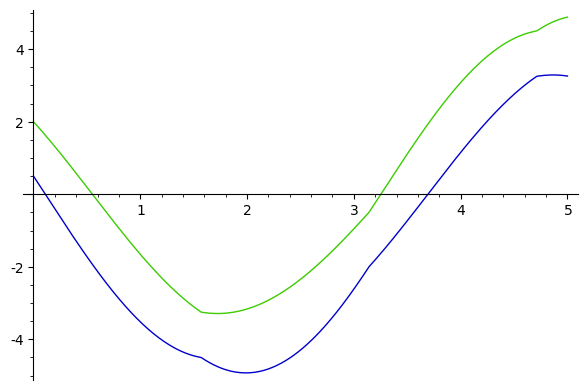

In [47]:
p1 = plot(
    (lambda t: sin_cos_solution(*physical_subdomain, t)[0].lower(),
     lambda t: sin_cos_solution(*physical_subdomain, t)[0].upper()),
    (0, 5),
); p1

In [44]:
r = system.with_y0(physical_subdomain).reach(5, step=(0.001, 0.1), order=10)

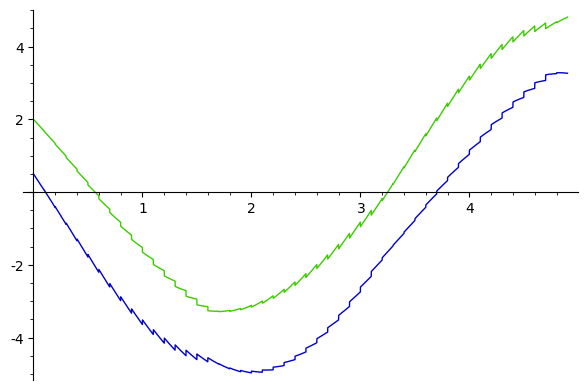

In [48]:
p2 = plot((lambda t: r(t)[0].lower(),
           lambda t: r(t)[0].upper()), (0, 4.9))
p2

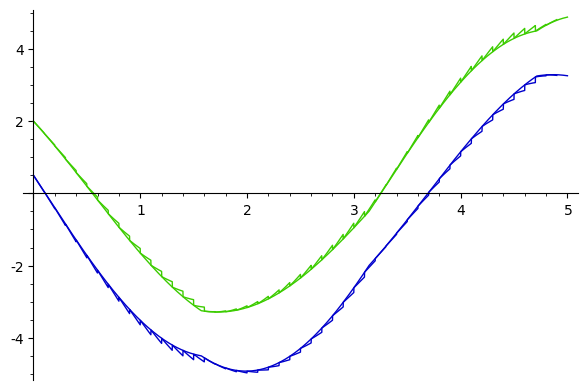

In [49]:
p1 + p2

In [50]:
explicitly_computed_signal = interval_signals.to_signal(
    lambda t: sin_cos_solution(*physical_subdomain, t)[0],
    lambda t: -sin_cos_solution(*physical_subdomain, t)[1],
    RIF(0, 5),
)
explicitly_computed_signal

domain = [0.0000000000000000 .. 5.0000000000000000]
roots = [[0.11065496180530458 .. 0.11065596180530459], 
 [0.11165596180530458 .. 0.55166863210689010], 
 [3.2522485553989626 .. 3.2522495553989628], 
 [3.2532495553989630 .. 3.6932569390386707]]
seg_domain = [0.0000000000000000 .. 5.0000000000000000]
roots = []
signal given bool roots: 1 items in 0.08 seconds


Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 5.0000000000000000], False)], mask=None)

In [51]:
explicitly_computed_signal = interval_signals.to_signal_bisection(
    lambda t: sin_cos_solution(*physical_subdomain, t)[0],
    RIF(0, 5),
)
explicitly_computed_signal

Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.078125000000000000], True), ([0.62500000000000000 .. 3.2031250000000000], False), ([3.7500000000000000 .. 5.0000000000000000], True)], mask=None)